C:\Users\default.LAPTOP-FH3QCVP1\AppData\Local\Temp\ipykernel_12132\3364095935.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv(r'C:\Users\default.LAPTOP-FH3QCVP1\OneDrive\Documents\Python Scripts\stock-market-data\stock_market_data\sp500\csv\WAT.csv', index_col='Date', parse_dates=["Date"])


C:\Users\default.LAPTOP-FH3QCVP1\AppData\Local\Temp\ipykernel_12132\3364095935.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df["High"]['2017':].plot(figsize=(16, 4), legend=True)


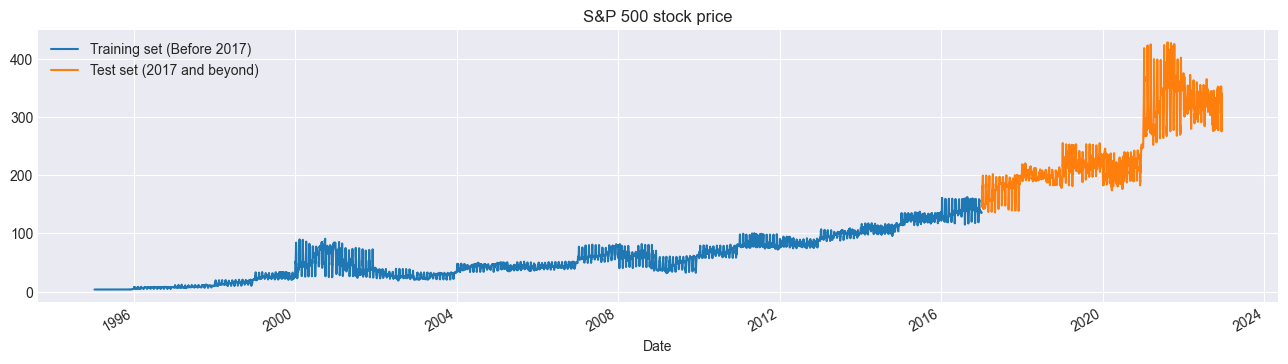

In [296]:
import pandas as pd
df = pd.read_csv(r'C:\Users\default.LAPTOP-FH3QCVP1\OneDrive\Documents\Python Scripts\stock-market-data\stock_market_data\sp500\csv\WAT.csv', index_col='Date', parse_dates=["Date"])
import matplotlib.pyplot as plt
# Plot the training set
df["High"][:'2016'].plot(figsize=(16, 4), legend=True)
# Plot the test set
df["High"]['2017':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'])
plt.title('S&P 500 stock price')
plt.show()

In [297]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming `df` contains your data
trainning_set = df[:'2016'].iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(trainning_set)

test_set = df['2017':].iloc[:, 1:2].values

X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


C:\Users\default.LAPTOP-FH3QCVP1\AppData\Local\Temp\ipykernel_12132\1927331412.py:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  test_set = df['2017':].iloc[:, 1:2].values


In [298]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

In [299]:
regressor.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
165/165 [==============================] - 19s 72ms/step - loss: 0.0089
Epoch 2/5
165/165 [==============================] - 12s 73ms/step - loss: 0.0036
Epoch 3/5
165/165 [==============================] - 12s 73ms/step - loss: 0.0031
Epoch 4/5
165/165 [==============================] - 12s 73ms/step - loss: 0.0029
Epoch 5/5
165/165 [==============================] - 13s 79ms/step - loss: 0.0026


In [300]:
# pre-processing the data 
dataset_total = pd.concat((df["High"][:'2016'],df["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

# making the test data
X_test = []
for i in range(60,len(inputs)):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\default.LAPTOP-FH3QCVP1\AppData\Local\Temp\ipykernel_12132\2065664682.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dataset_total = pd.concat((df["High"][:'2016'],df["High"]['2017':]),axis=0)


47/47 [==============================] - 3s 27ms/step


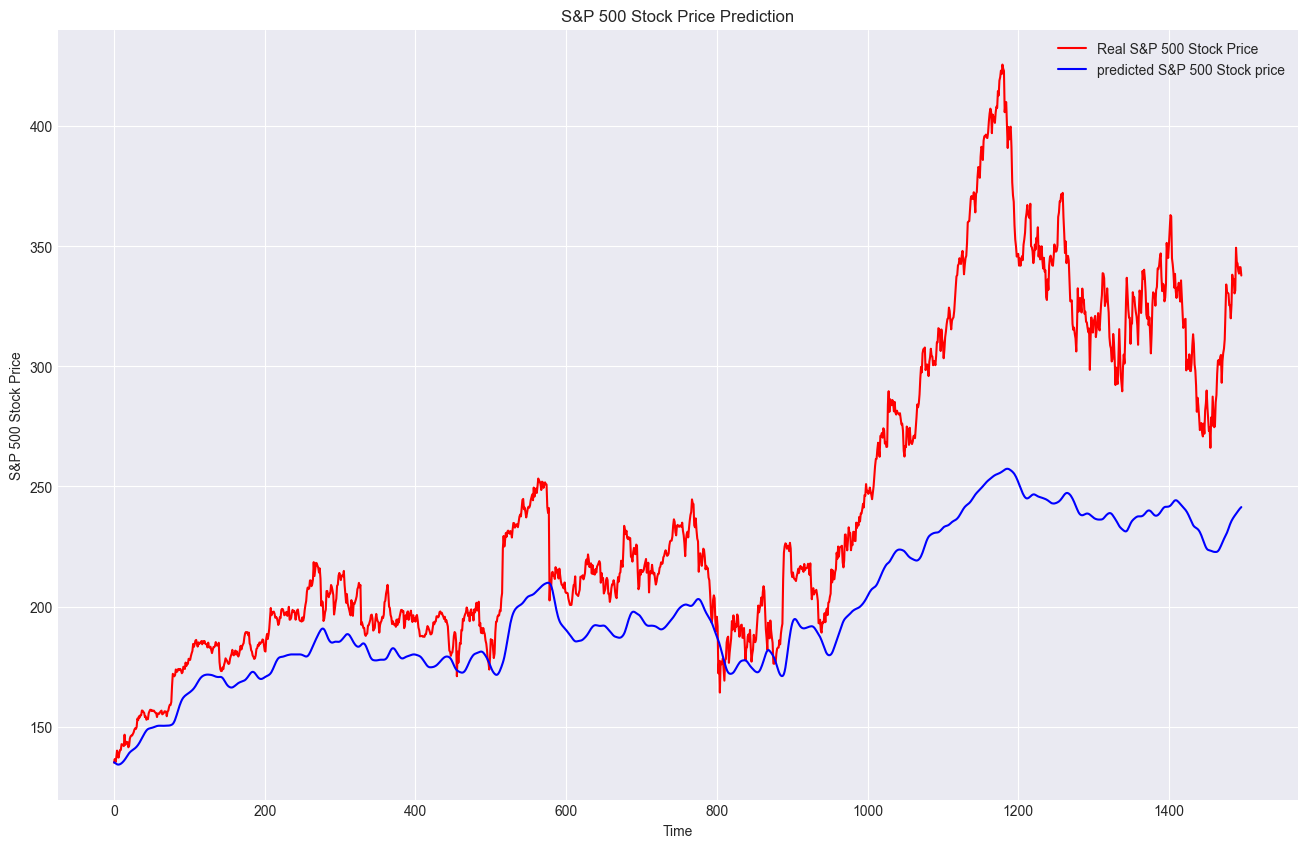

In [301]:
def plot_prediction(test,prediction):
    plt.plot(test,color='red',label="Real S&P 500 Stock Price")
    plt.plot(prediction, color="blue",label="predicted S&P 500 Stock price")
    plt.title("S&P 500 Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("S&P 500 Stock Price")
    plt.legend()
    plt.show()
# now we'll use this function to visualize our test and predicted data

plot_prediction(test_set,predicted_stock_price)

In [302]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test,predicted))
    print("The root mean sqaured error is {}.".format(rmse))

In [303]:
from keras.models import Sequential
from keras.layers import GRU, Dropout
regressorGRU = Sequential()

regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.3))
# Second GRU layer
regressorGRU.add(GRU(units=80, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.1))
# Fourth GRU layer
regressorGRU.add(GRU(units=30, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer='adam',loss='mean_squared_error')

# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=5,batch_size=150)

Epoch 1/5
36/36 [==============================] - 13s 152ms/step - loss: 0.0207
Epoch 2/5
36/36 [==============================] - 5s 151ms/step - loss: 0.0039
Epoch 3/5
36/36 [==============================] - 6s 156ms/step - loss: 0.0028
Epoch 4/5
36/36 [==============================] - 6s 163ms/step - loss: 0.0025
Epoch 5/5
36/36 [==============================] - 6s 152ms/step - loss: 0.0024


In [304]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressorGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

47/47 [==============================] - 3s 26ms/step


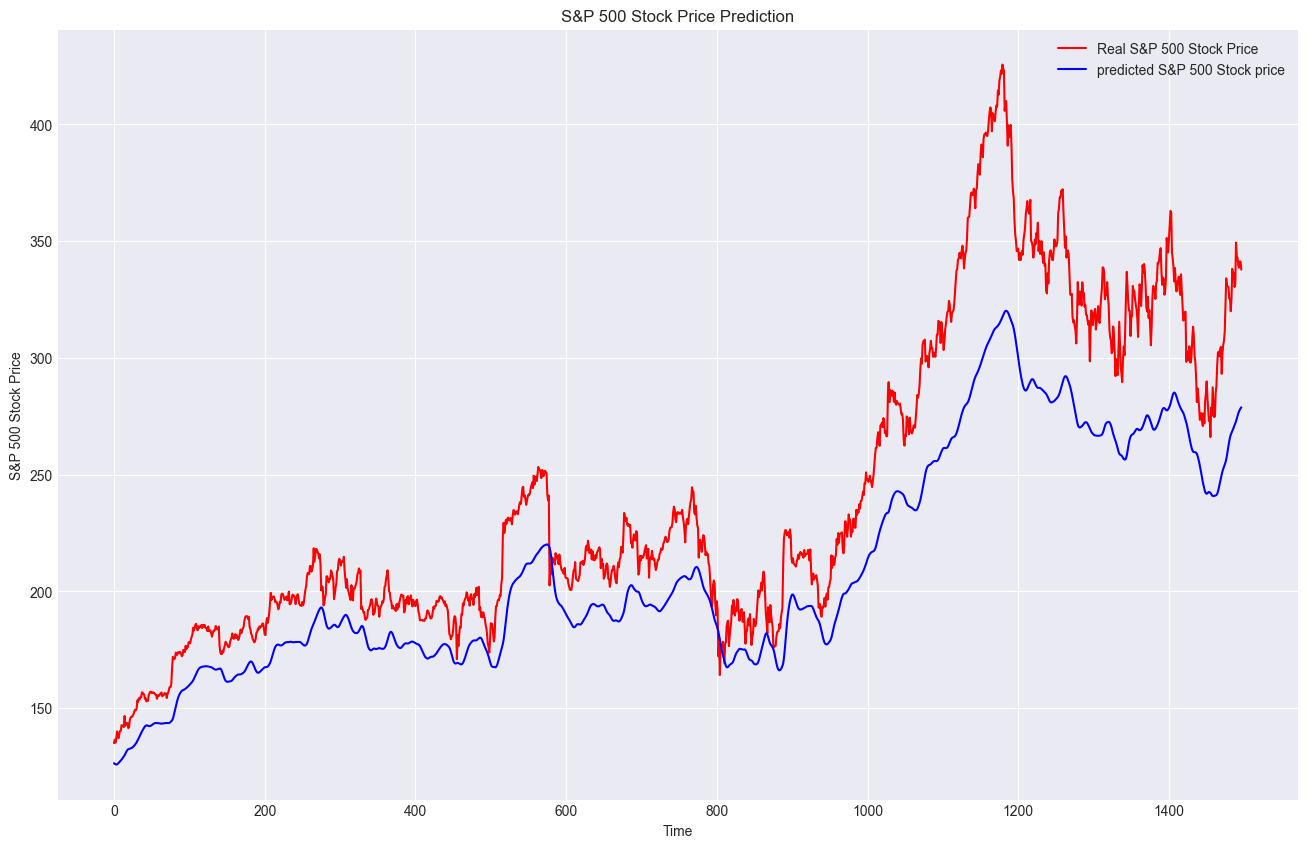

In [305]:
plot_prediction(test_set,predicted_stock_price) 

In [306]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

C:\Users\default.LAPTOP-FH3QCVP1\AppData\Local\Temp\ipykernel_12132\4095984700.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [307]:
data = pd.read_csv(r'C:\Users\default.LAPTOP-FH3QCVP1\OneDrive\Documents\Python Scripts\stock-market-data\stock_market_data\sp500\csv\WAT.csv')
end_date = datetime.date.today()
data.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,17-11-1995,3.75,3.75,12706000,3.81250,3.78125,3.78125
1,20-11-1995,3.75,3.75,1213200,3.78125,3.75000,3.75000
2,21-11-1995,3.75,3.75,909600,3.78125,3.75000,3.75000
3,22-11-1995,3.75,3.75,1314800,3.78125,3.75000,3.75000
4,24-11-1995,3.75,3.75,275200,3.78125,3.75000,3.75000


In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6814 entries, 0 to 6813
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6814 non-null   object 
 1   Low             6814 non-null   float64
 2   Open            6814 non-null   float64
 3   Volume          6814 non-null   int64  
 4   High            6814 non-null   float64
 5   Close           6814 non-null   float64
 6   Adjusted Close  6814 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 372.8+ KB


In [309]:
data.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,6814.000000,6814.000000,6.814000e+03,6814.000000,6814.000000,6814.000000
mean,96.785351,97.907559,7.233968e+05,99.023690,97.945920,97.945920
std,87.427220,88.372436,6.983983e+05,89.303016,88.393694,88.393694
min,3.312500,3.437500,2.120000e+04,3.562500,3.437500,3.437500
25%,35.549999,36.192499,3.894000e+05,36.767501,36.200001,36.200001
50%,64.905003,66.213749,5.742000e+05,67.291248,66.325001,66.325001
75%,132.525002,133.352501,8.666250e+05,134.305004,133.475002,133.475002
max,421.380005,425.649994,2.019440e+07,428.220001,424.700012,424.700012


In [310]:
data.columns
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


In [311]:
data = pd.DataFrame(data, columns=['Date','Close'])
data = data.reset_index()
data.head()

,index,Date,Close
0,0,1995-11-17,3.78125
1,1,1995-11-20,3.75000
2,2,1995-11-21,3.75000
3,3,1995-11-22,3.75000
4,4,1995-11-24,3.75000


In [312]:
data.info()
data.isna().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6814 entries, 0 to 6813
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   6814 non-null   int64         
 1   Date    6814 non-null   datetime64[ns]
 2   Close   6814 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 159.8 KB


False

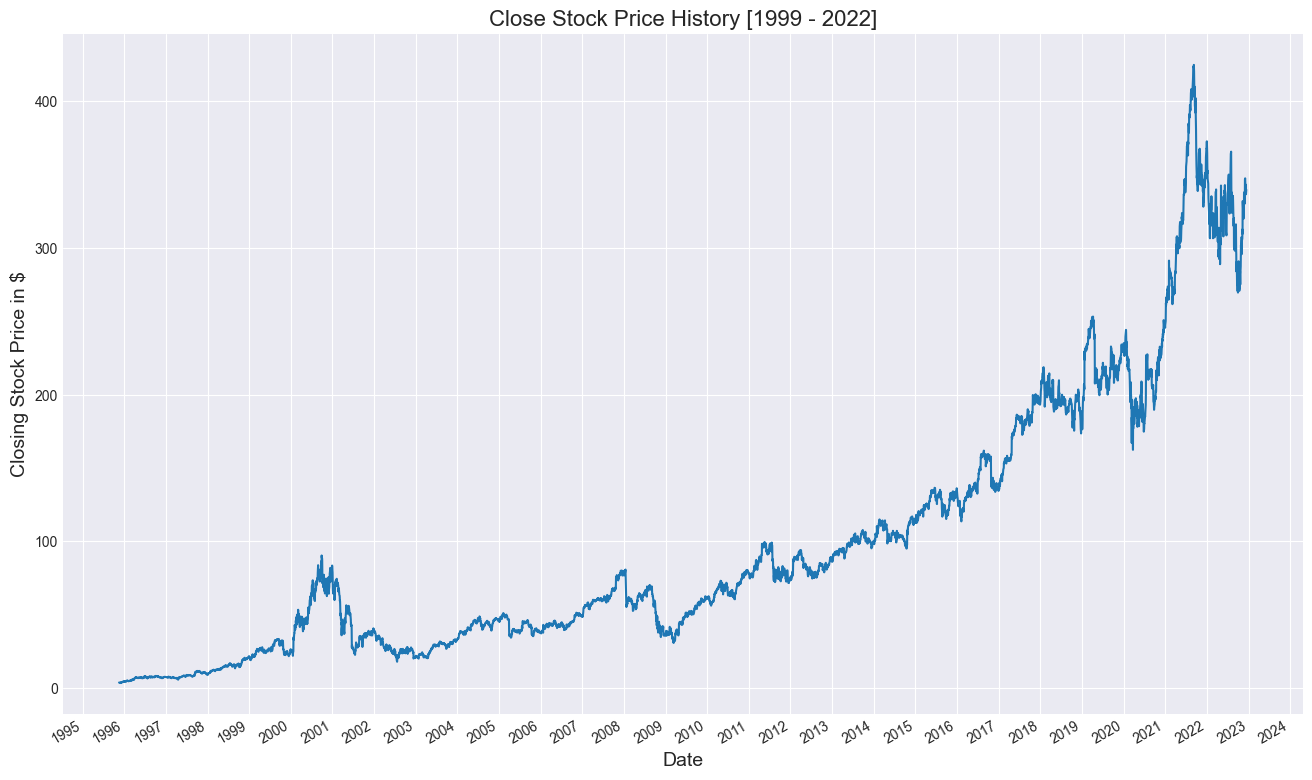

In [313]:
import matplotlib.dates as mdates

start_date = datetime.date(1999, 11, 18)

# Get every year starting from the start_date year
years = mdates.YearLocator()

# Set year format
yearsFmt = mdates.DateFormatter('%Y')
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(data['Date'], data['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [1999 - 2022]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [314]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20)
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

Slope:  0.03953639385515842
Intercept:  -36.99593809632891


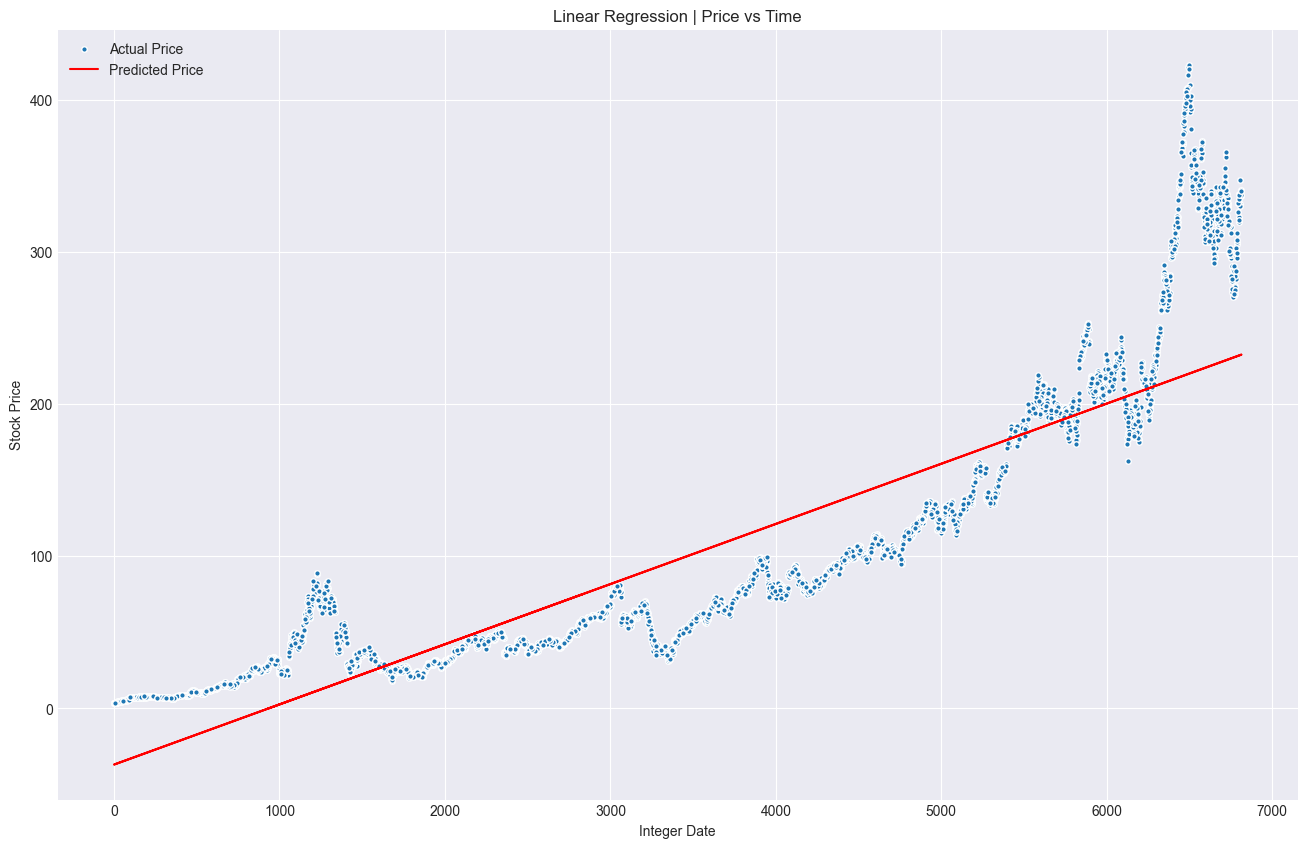

In [315]:
# The coefficient
print('Slope: ', np.squeeze(model.coef_))
# The Intercept
print('Intercept: ', model.intercept_)
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [316]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']
# Generate array with predicted values
y_pred = model.predict(X_test)

In [317]:
data.shape

(6814, 3)

In [318]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = data[data.index.isin(randints)]
df_sample.head()

,index,Date,Close
163,163,1996-07-12,7.68750
177,177,1996-08-01,7.25000
275,275,1996-12-19,7.68750
407,407,1997-06-30,8.96875
507,507,1997-11-19,10.15625


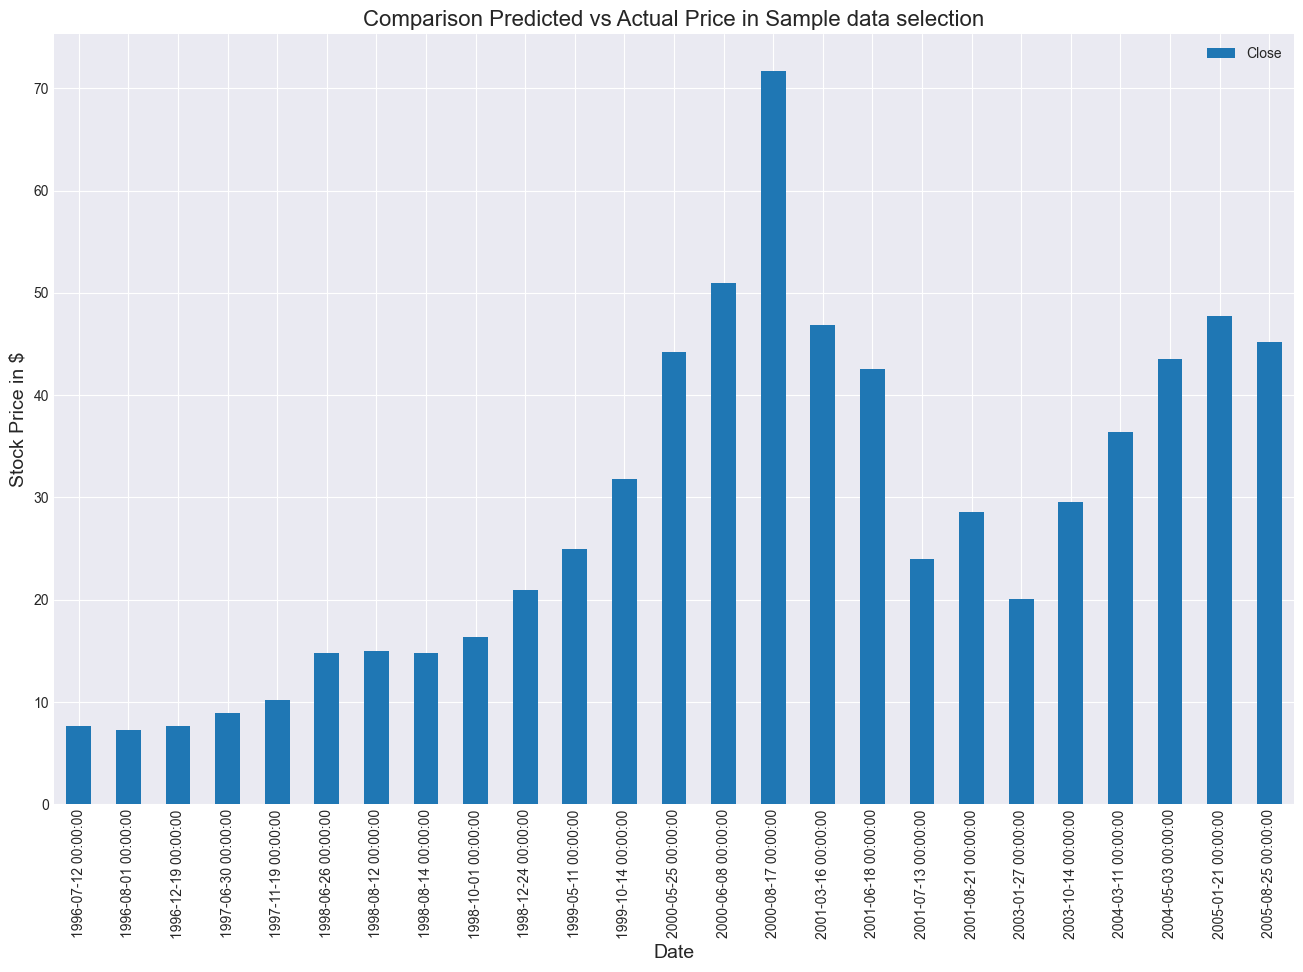

In [319]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()

df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

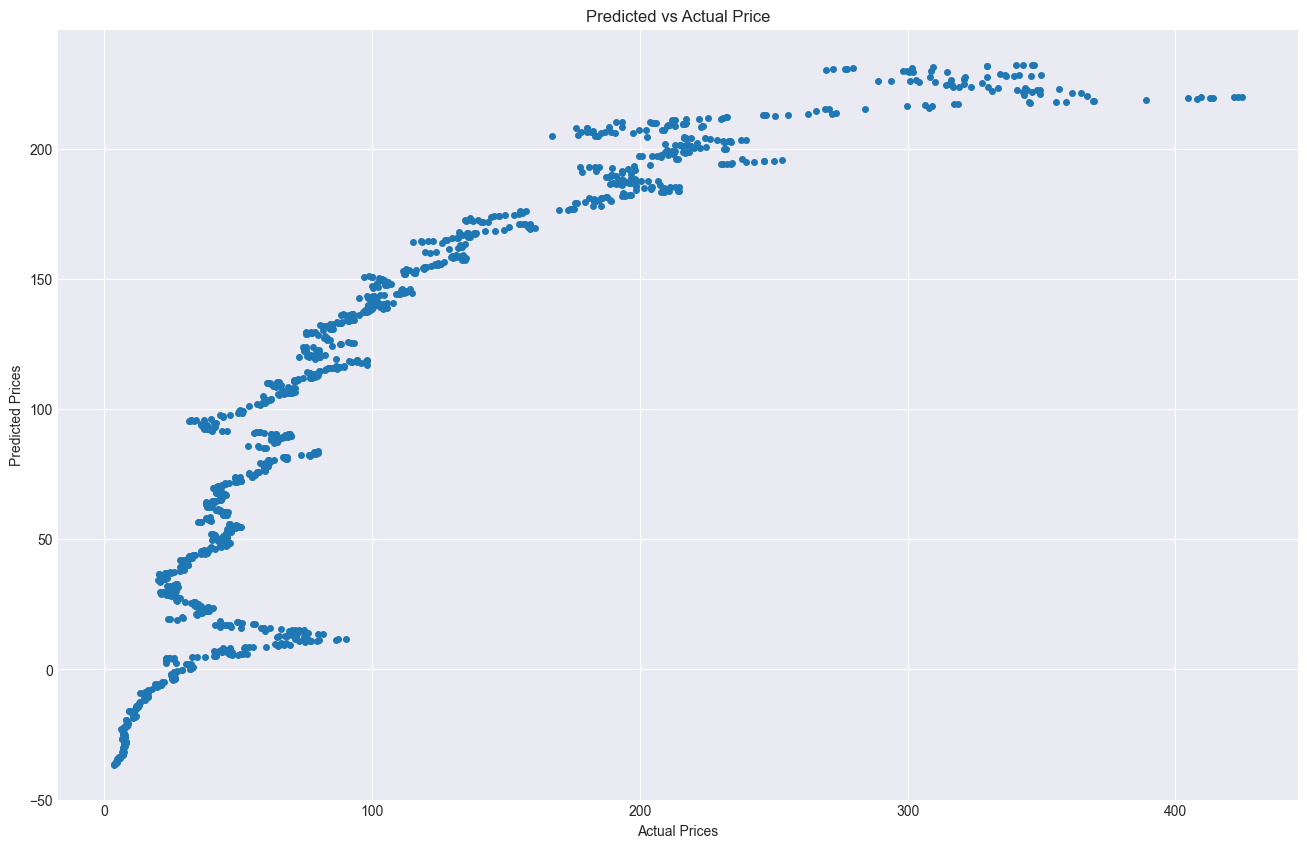

In [320]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

In [321]:
# Add new column for predictions to df
data['Prediction'] = model.predict(np.array(data.index).reshape(-1, 1))
data.head()

,index,Date,Close,Prediction
0,0,1995-11-17,3.78125,-36.995938
1,1,1995-11-20,3.75000,-36.956402
2,2,1995-11-21,3.75000,-36.916865
3,3,1995-11-22,3.75000,-36.877329
4,4,1995-11-24,3.75000,-36.837793


In [322]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics
# Statistical summary of test data
data['Close'].describe()


count    6814.000000
mean       97.945920
std        88.393694
min         3.437500
25%        36.200001
50%        66.325001
75%       133.475002
max       424.700012
Name: Close, dtype: float64

In [323]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 32.1785490636235
Mean Squared Error: 1745.239392573265
Root Mean Squared Error: 41.776062435002956


In [324]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.775393886165654


In [325]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.7756132180696839

In [326]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the 50-day and 100-day moving averages with a minimum of observations
data['50_day_avg'] = data['Close'].rolling(window=50, min_periods=50).mean()
data['100_day_avg'] = data['Close'].rolling(window=100, min_periods=100).mean()
filtered_data = data.dropna(subset=['100_day_avg'])
# Filter the data to exclude rows with NaN values in the moving averages

# Predict the trend based on the moving averages
trend_predictions = []
for i in range(1, len(filtered_data)):
    if filtered_data['50_day_avg'].iloc[i] > filtered_data['50_day_avg'].iloc[i - 1] and \
            filtered_data['100_day_avg'].iloc[i] > filtered_data['100_day_avg'].iloc[i - 1]:
        trend_predictions.append('Uptrend')
    elif filtered_data['50_day_avg'].iloc[i] < filtered_data['50_day_avg'].iloc[i - 1] and \
            filtered_data['100_day_avg'].iloc[i] < filtered_data['100_day_avg'].iloc[i - 1]:
        trend_predictions.append('Downtrend')
    else:
        trend_predictions.append('No Clear Trend')

# Add the trend predictions to the filtered data DataFrame
filtered_data = filtered_data.iloc[1:]  # Drop the first row to match the length
filtered_data['Trend'] = trend_predictions

print(filtered_data.head(100))



     index       Date    Close  Prediction  50_day_avg  100_day_avg    Trend
100    100 1996-04-12  7.34375  -33.042299    5.602500     4.942812  Uptrend
101    101 1996-04-15  7.28125  -33.002762    5.648750     4.978125  Uptrend
102    102 1996-04-16  7.40625  -32.963226    5.700625     5.014687  Uptrend
103    103 1996-04-17  7.37500  -32.923690    5.750625     5.050937  Uptrend
104    104 1996-04-18  7.46875  -32.884153    5.805625     5.088125  Uptrend
..     ...        ...      ...         ...         ...          ...      ...
195    195 1996-08-27  7.96875  -29.286341    7.420000     7.242188  Uptrend
196    196 1996-08-28  7.81250  -29.246805    7.440625     7.250312  Uptrend
197    197 1996-08-29  7.81250  -29.207269    7.454375     7.257500  Uptrend
198    198 1996-08-30  7.84375  -29.167732    7.467500     7.263750  Uptrend
199    199 1996-09-03  7.68750  -29.128196    7.478750     7.270000  Uptrend

[100 rows x 7 columns]


In [327]:
last_120_data = data[-120:]

# Extract features (X) and target variable (y)
X_last_120 = np.array(last_120_data.index).reshape(-1, 1)
y_last_120 = last_120_data['Close']

# Extend X values by 120 points
extended_X = np.arange(last_120_data.index.min(), last_120_data.index.max() + 121).reshape(-1, 1)

# Create a new linear regression model
model_last_120_extended = LinearRegression()

# Fit the model on the last 120 data points
model_last_120_extended.fit(X_last_120, y_last_120)

# Calculate the intercept 1 standard deviation higher
close_std = data['Close'].std()
intercept_adjusted = model_last_120_extended.intercept_

# Calculate the predicted values for the extended range
extended_y_pred = model_last_120_extended.predict(extended_X)

# Print the coefficients of the linear regression model
print('Slope: ', np.squeeze(model_last_120_extended.coef_))
print('Intercept (Adjusted): ', intercept_adjusted)

Slope:  -0.20978931443162563
Intercept (Adjusted):  1732.38521952733


In [328]:


model_last_120_upper = LinearRegression()

# Fit the model on the last 120 data points
model_last_120_upper.fit(X_last_120, y_last_120)

# Add 1 standard deviation to the intercept
model_last_120_upper.intercept_ += (last_120_data['Close'].std() * 1.5)
extended_y_pred_upper = model_last_120_upper.predict(extended_X)

# Print the coefficients of the linear regression model
print('Slope: ', np.squeeze(model_last_120_upper.coef_))
print('Intercept: ', model_last_120_upper.intercept_)

Slope:  -0.20978931443162563
Intercept:  1770.7065393765233


In [329]:
model_last_120_lower = LinearRegression()

# Fit the model on the last 120 data points
model_last_120_lower.fit(X_last_120, y_last_120)

# Add 1 standard deviation to the intercept
model_last_120_lower.intercept_ -= (last_120_data['Close'].std() * 1.5)
extended_y_pred_lower = model_last_120_lower.predict(extended_X)

# Print the coefficients of the linear regression model
print('Slope: ', np.squeeze(model_last_120_lower.coef_))
print('Intercept: ', model_last_120_lower.intercept_)

Slope:  -0.20978931443162563
Intercept:  1694.0638996781367


Slope:  0.03953639385515842
Intercept:  -36.99593809632891


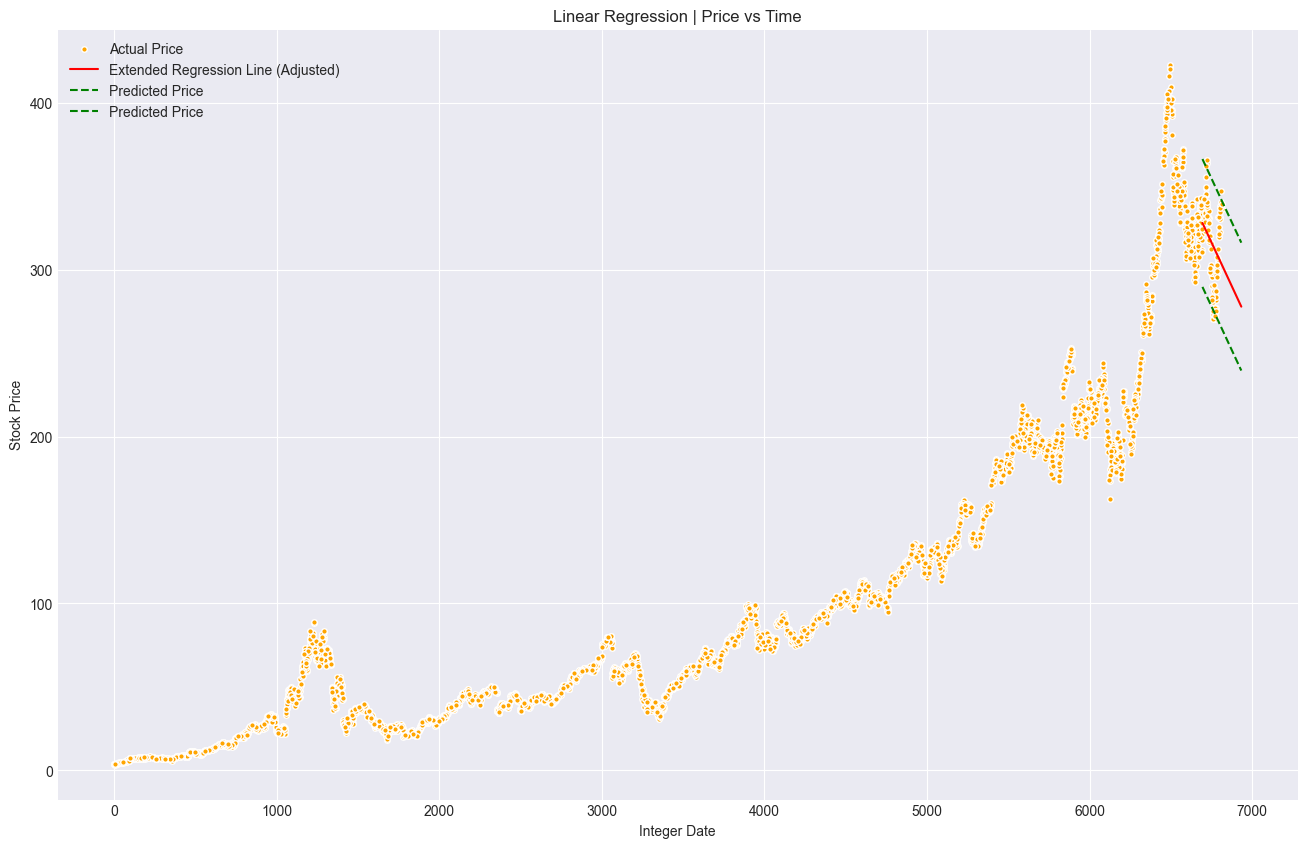

In [330]:
print('Slope: ', np.squeeze(model.coef_))
# The Intercept
print('Intercept: ', model.intercept_)
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price',color='orange')
plt.plot(extended_X, extended_y_pred, color='r', label='Extended Regression Line (Adjusted)')
plt.plot(extended_X, extended_y_pred_upper, color='g', label='Predicted Price', linestyle='--')
plt.plot(extended_X, extended_y_pred_lower, color='g', label='Predicted Price', linestyle='--')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

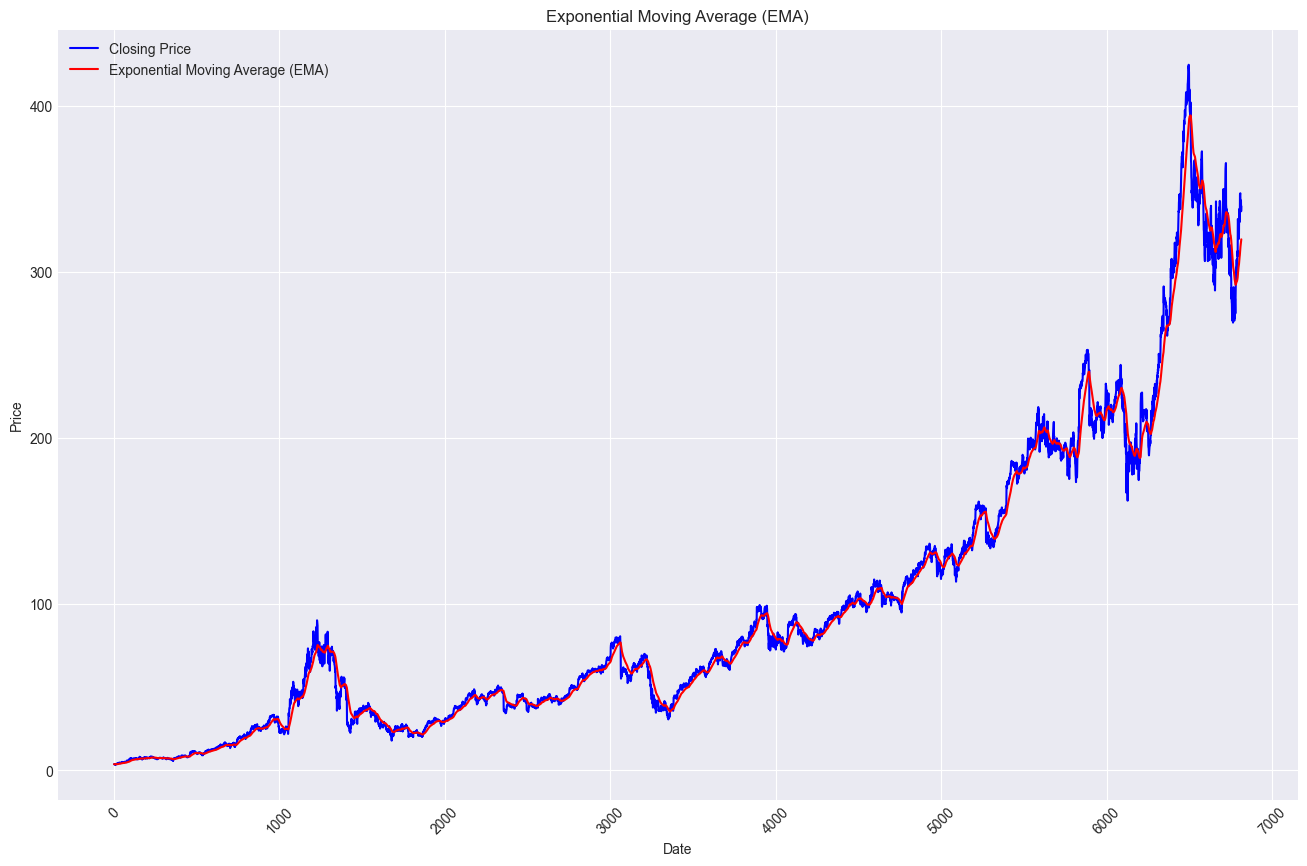

In [331]:
# Calculate EMA
# Adjust span and min_periods as needed
span = 50  # Span for EMA
min_periods = 1  # Minimum number of observations in window
data['EMA'] = data['Close'].ewm(span=span, min_periods=min_periods, adjust=False).mean()

# Plotting
plt.figure(figsize=(16, 10))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.plot(data.index, data['EMA'], label='Exponential Moving Average (EMA)', color='red')

# Formatting
plt.title('Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Display
plt.show()

In [332]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.interpolate import interp1d

# Assuming `predicted_stock_price` and `data` are defined elsewhere
# Load predictions from Linear Regression, LSTM, and Moving Average models
# Load predictions from Linear Regression, LSTM, and Moving Average models

lr_predictions = extended_y_pred
lr_predictions = lr_predictions.reshape(-1, 1) if len(lr_predictions.shape) == 1 else lr_predictions

# Ensure that LSTM predictions match the length of Linear Regression predictions
lstm_predictions = predicted_stock_price[-len(lr_predictions):]
interp_func = interp1d(np.arange(len(lstm_predictions)), lstm_predictions, axis=0)
lstm_predictions_resized = interp_func(np.linspace(0, len(lstm_predictions) - 1, len(lr_predictions)))
ma_predictions = data['EMA'][-len(lr_predictions):].values.reshape(-1, 1)  # Reshape to 2D array

# Combine predictions horizontally
stacked_features = np.column_stack((lr_predictions, lstm_predictions_resized, ma_predictions))

# Load true target variable (actual stock prices)
y_true = data["Close"][-len(lr_predictions):]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stacked_features, y_true, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train.ravel())  # Flatten y_train to 1D array

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 49.67244958463676


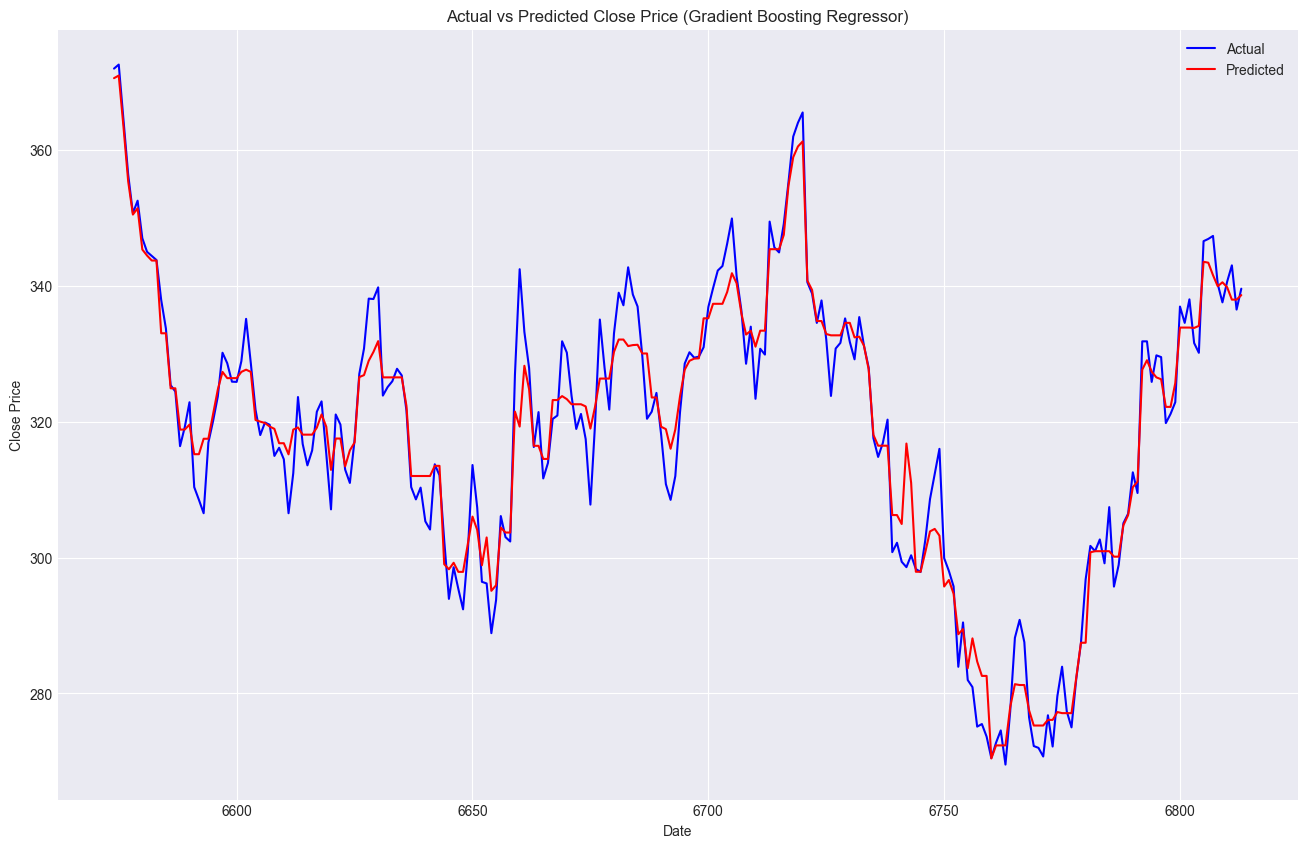

In [333]:
import matplotlib.pyplot as plt

# Predict target variable using the trained model
y_pred_all = gb_regressor.predict(stacked_features)

# Plot actual values vs predicted values
plt.figure(figsize=(16, 10))
plt.plot(data.index[-len(y_pred_all):], y_true, label='Actual', color='blue')
plt.plot(data.index[-len(y_pred_all):], y_pred_all, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price (Gradient Boosting Regressor)')
plt.legend()
plt.show()


04:39:51 - cmdstanpy - INFO - Chain [1] start processing
04:39:51 - cmdstanpy - INFO - Chain [1] done processing


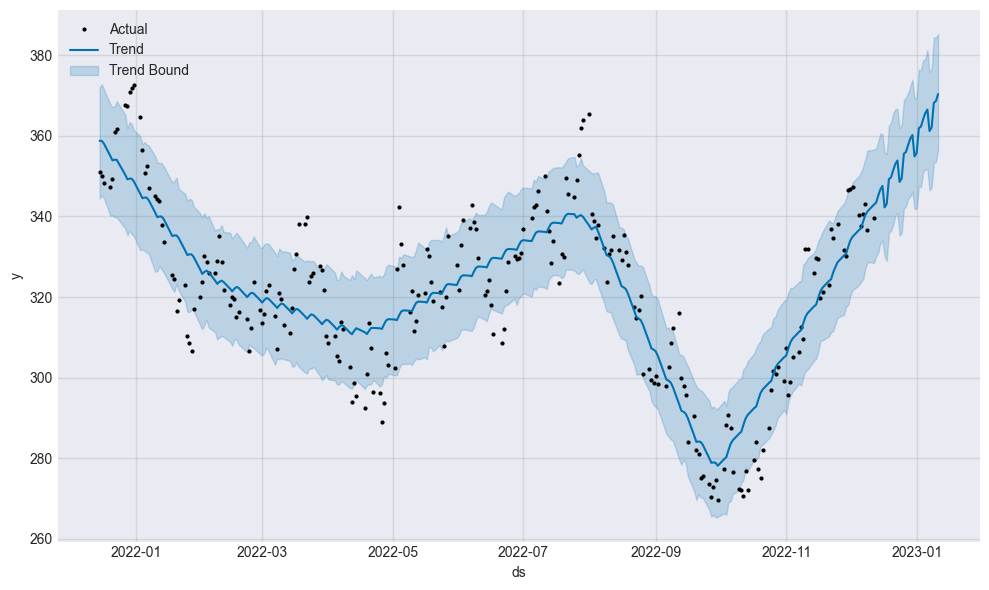

In [340]:
from prophet import Prophet
import pandas as pd

#Load stock data from Kaggle dataset
#data = pd.read_csv(r'C:\Users\default.LAPTOP-FH3QCVP1\OneDrive\Documents\Python Scripts\stock-market-data\stock_market_data\sp500\csv\V.csv')
data = data.tail(250)
#Rename columns to 'ds' and 'y'
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

#Create a Prophet model
model = Prophet()

#Fit the model
model.fit(data)
fig = model.plot(forecast)

# Create a legend
plt.legend(['Actual', 'Trend', 'Trend Bound', 'Trend Bound', 'Forecast', 'Forecast Lower Bound', 'Forecast Upper Bound'], loc='upper left')


#Make future predictions
future_dates = model.make_future_dataframe(periods=30)  # Forecasting 30 days into the future
forecast = model.predict(future_dates)
